In [1]:
import scipy.stats
import math
import numpy as np
import matplotlib.pyplot as plt

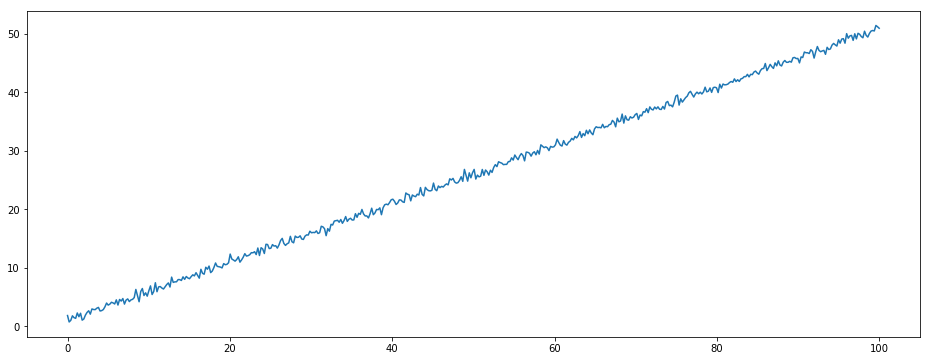

In [2]:
sample = scipy.stats.norm(0, math.sqrt(0.2)).rvs(500)
x = np.linspace(0, 100, num = 500)
y = sample + 0.5 * x + 1

plt.figure(figsize = (16, 6))
plt.plot(x,y)
plt.show()

[ 0.49944258  1.02083877]


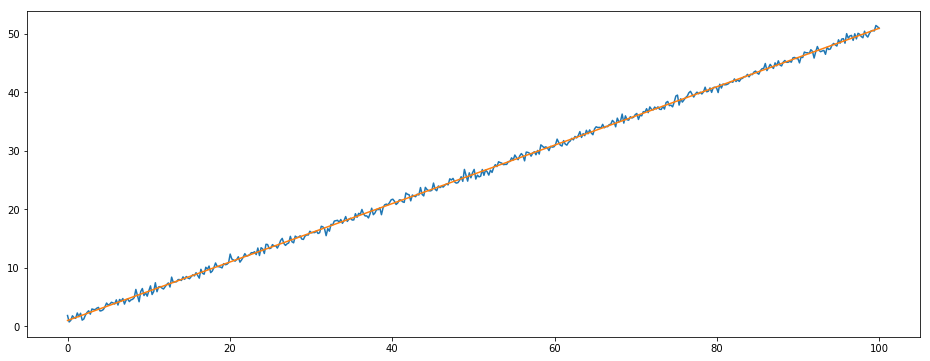

In [14]:
params = scipy.optimize.minimize(fun = lambda (k,b): ((y - k * x - b) ** 2).mean(), x0=(0,0)).x
print params
plt.figure(figsize = (16, 6))
plt.plot(x,y)
plt.plot(x, x * params[0] + params[1])
plt.show()

[ 0.49944258  1.02083877]


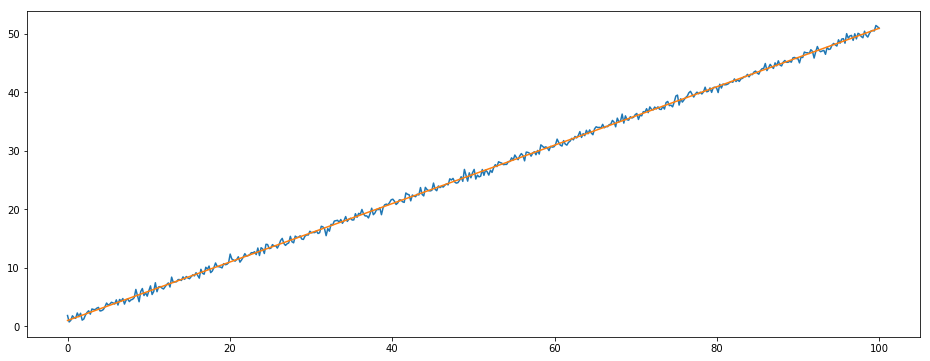

In [15]:
params = scipy.optimize.minimize(fun = lambda (k,b): ((y - k * x - b) ** 2).mean(), x0=(0,0)).x
print params
plt.figure(figsize = (16, 6))
plt.plot(x,y)
plt.plot(x, x * params[0] + params[1])
plt.show()

[ 0.49944258  1.02083876]


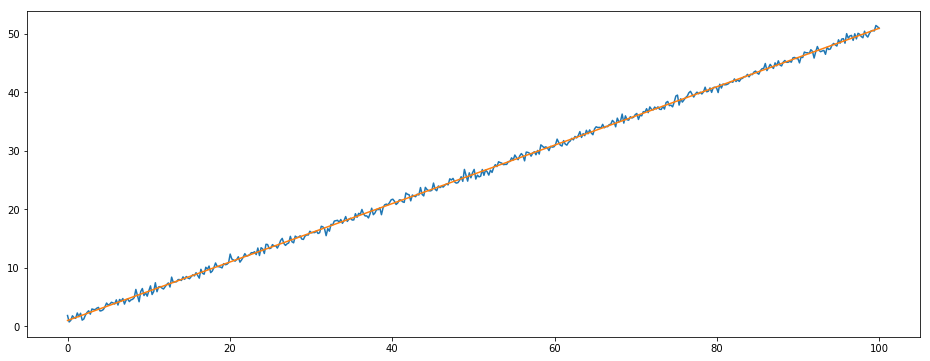

In [18]:
params = scipy.optimize.minimize(fun = lambda (k,b): ((y - k * x - b) ** 2).mean(), x0=(5000,5000)).x
print params
plt.figure(figsize = (16, 6))
plt.plot(x,y)
plt.plot(x, x * params[0] + params[1])
plt.show()

[ 0.49944263  1.0208353 ]


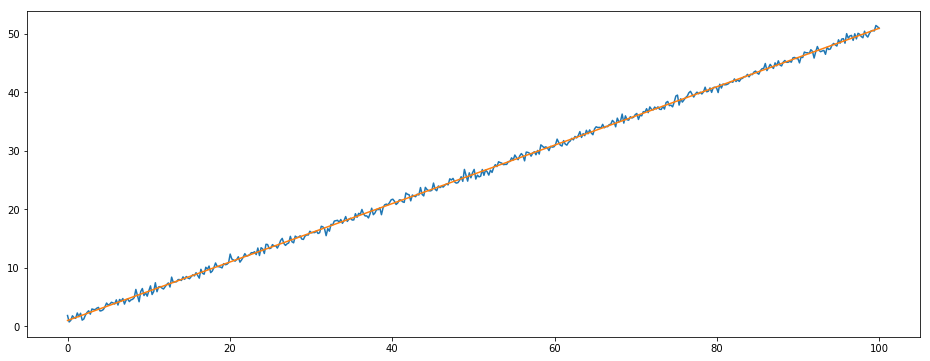

In [19]:
params = scipy.optimize.minimize(fun = lambda (k,b): ((y - k * x - b) ** 2).mean(), x0=(-5000,50000)).x
print params
plt.figure(figsize = (16, 6))
plt.plot(x,y)
plt.plot(x, x * params[0] + params[1])
plt.show()

[ 0.49944258  1.02083878]


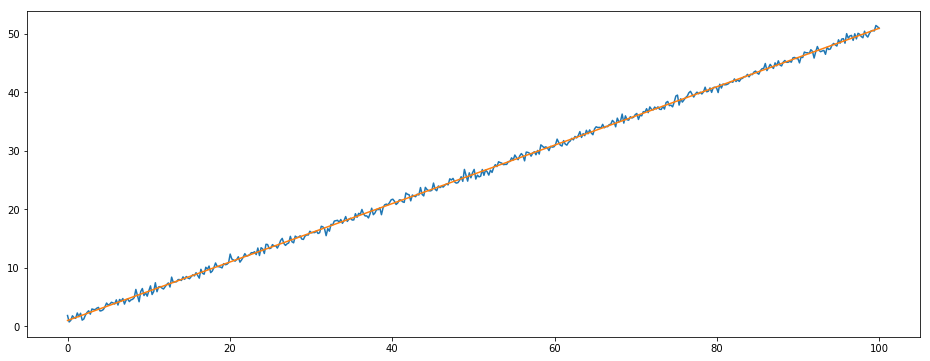

In [20]:
params = scipy.optimize.minimize(fun = lambda (k,b): ((y - k * x - b) ** 2).mean(), x0=(-50000,-50000)).x
print params
plt.figure(figsize = (16, 6))
plt.plot(x,y)
plt.plot(x, x * params[0] + params[1])
plt.show()

[ 0.43254321  0.82247122]
[ 0.49941023  0.92741873]


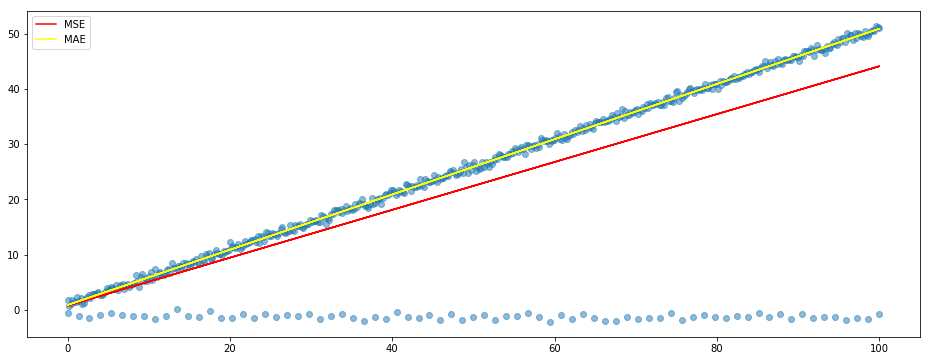

In [4]:
x_new = np.concatenate([x, np.linspace(0, 100, num = 75) ])
y_new = np.concatenate([y, -1 + scipy.stats.norm(0, math.sqrt(0.2)).rvs(75)])

paramsMSE = scipy.optimize.minimize(fun = lambda (k,b): ((y_new - k * x_new - b) ** 2).mean(), x0=(0,0)).x
paramsMAE = scipy.optimize.minimize(fun = lambda (k,b): (abs(y_new - k * x_new - b)).mean(), x0=(0,0)).x
print paramsMSE
print paramsMAE
plt.figure(figsize = (16, 6))
plt.scatter(x_new,y_new, alpha=0.5)
plt.plot(x_new, x_new * paramsMSE[0] + paramsMSE[1], color = "red") 
plt.plot(x_new, x_new * paramsMAE[0] + paramsMAE[1], color = "yellow")
plt.legend(['MSE', 'MAE'])
plt.show()

Для mae:
Даже при изменении почти половины объектов, медиана останется в неизмененных.
Для mse:
Изменяя одно значение, среднее можно изменить на сколько угодно большое значение.
А значит, mae более устойчиво к выбросам.